In [1]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 19s 2us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

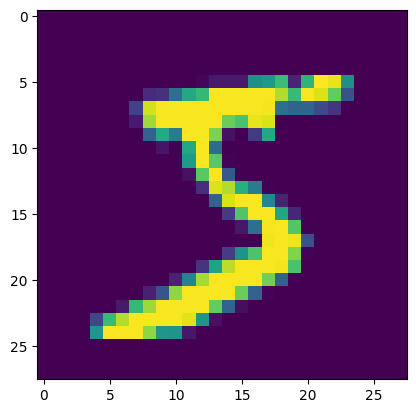

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
X_train = X_train/255
X_test = X_test / 255

In [51]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


In [52]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 32)                4128      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [54]:
history = model.fit(X_train, y_train, epochs = 25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2842 - accuracy: 0.9160 - val_loss: 0.1500 - val_accuracy: 0.9560
Epoch 2/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1188 - accuracy: 0.9640 - val_loss: 0.1333 - val_accuracy: 0.9586
Epoch 3/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0836 - accuracy: 0.9744 - val_loss: 0.1038 - val_accuracy: 0.9691
Epoch 4/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0628 - accuracy: 0.9811 - val_loss: 0.1086 - val_accuracy: 0.9684
Epoch 5/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0491 - accuracy: 0.9840 - val_loss: 0.0975 - val_accuracy: 0.9707
Epoch 6/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.0934 - val_accuracy: 0.9733
Epoch 7/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0331 - accuracy: 0.9892 - val_loss: 0.0992 - val_accuracy:

In [55]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 888us/step


In [56]:
y_pred = y_prob.argmax(axis = 1)

In [57]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [58]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9729

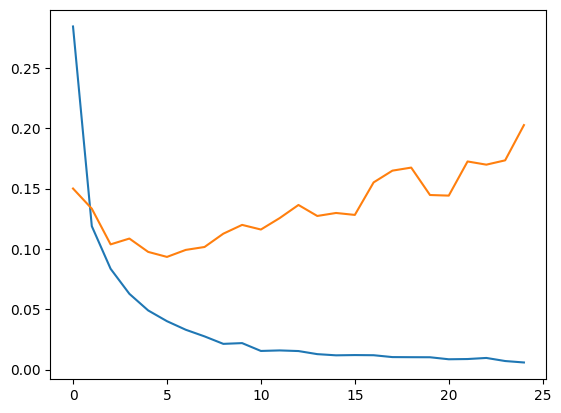

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

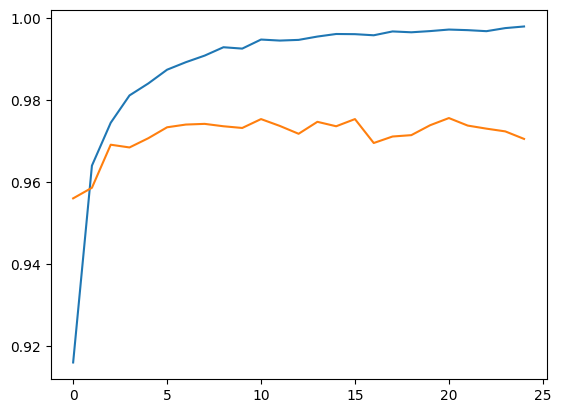

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

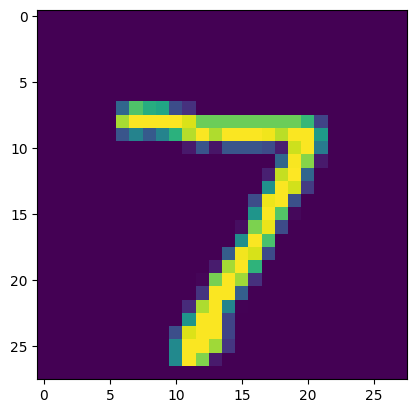

In [62]:
plt.imshow(X_test[0])

In [64]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 15ms/step


array([7], dtype=int64)